### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

The Independent variables are the words and the colors used in the experiement. The Dependent variables: are the results(time) of the individuals after performing the experiment. 

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.


$$ H_0 : μ_{c} - μ_{i} >= 0 $$

$$ H_1 : μ_{c} - μ_{i} < 0 $$



The null hypothesis (H0) is that the congruent population response time mean is **not** significantly less than the incongruent population response time mean. The alternative hypothesis (H1) is that the congruent population response time mean is significantly less than the incongruent population response time mean.

I would use a one-way paired-t test to test my hypotheses, because the data we've collected from the same participant are under two conditions.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [9]:
# Perform the analysis here
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.plotly as py
import seaborn as sns
import scipy.stats as stats

stroop = pd.read_csv("stroopdata.csv")

In [3]:
stroop.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [4]:
print(stroop)

    Congruent  Incongruent
0      12.079       19.278
1      16.791       18.741
2       9.564       21.214
3       8.630       15.687
4      14.669       22.803
5      12.238       20.878
6      14.692       24.572
7       8.987       17.394
8       9.401       20.762
9      14.480       26.282
10     22.328       24.524
11     15.298       18.644
12     15.073       17.510
13     16.929       20.330
14     18.200       35.255
15     12.130       22.158
16     18.495       25.139
17     10.639       20.429
18     11.344       17.425
19     12.369       34.288
20     12.944       23.894
21     14.233       17.960
22     19.710       22.058
23     16.004       21.157


In [6]:
stroop.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Based on the above table:  
  * The congruent sample has a mean  **14.05** seconds and a standard deviation **3.55** seconds.
  * The incongruent sample has a mean of **22.01** seconds and a standard deviation  **4.79** seconds.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Text(0.5,1,'KDE of Stroop effect')

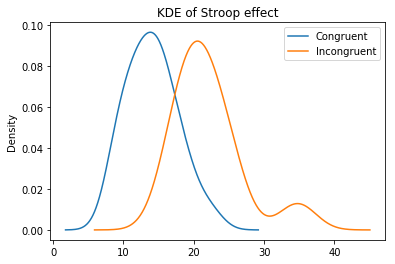

In [11]:
# Build the visualizations here

stroop.plot.kde()
plt.title('KDE of Stroop effect')

My Observation:
Both congruent and incongruent look normally distributed with a similar variance.
The incongruent task distribution of performance times seems to have a small peak around 35 seconds.

Text(0,0.5,'Frequency')

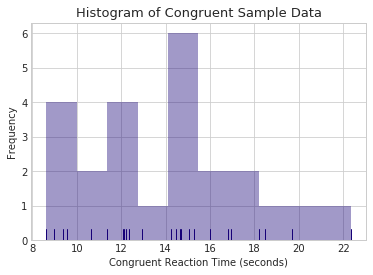

In [17]:
sns.set_style('whitegrid')
g = sns.distplot(stroop['Congruent'],rug=True,color="#160177",bins=10,kde=False)
g.axes.set_title('Histogram of Congruent Sample Data', fontsize=13)
plt.xlabel("Congruent Reaction Time (seconds)")
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

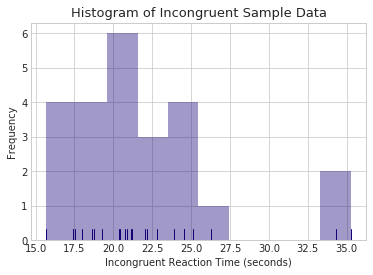

In [16]:
sns.set_style('whitegrid')
g = sns.distplot(stroop['Incongruent'],rug=True,color="#160177",bins=10,kde=False)
g.axes.set_title('Histogram of Incongruent Sample Data', fontsize=13)
plt.xlabel("Incongruent Reaction Time (seconds)")
plt.ylabel("Frequency")

From the above two graphs, 
* Congruent: it's normal distribution, most participants completed the test in ~15 seconds. 

* Incongruent: it's right skewed distribution. The majority of participants completed the test  between 17.5-21 seconds with some outliers completing the test in ~35 seconds.


(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [22]:
# Perform the statistical test here

mean_congurent = stroop['Congruent'].mean()
mean_incongurant = stroop['Incongruent'].mean()

# Calculte a point estimate using (mean_congurent - mean_incongurant) / Average of differences
estimate_point = mean_congurent - mean_incongurant

# Calculate Square of Sums of difference of sample means
ssd = sum( ( (stroop['Congruent'] - stroop['Incongruent']) - estimate_point ) ** 2  )

# Calculate the variance of difference
vd = ssd / (24 -1)

# Calculate Standard Deviation of Differences
sdd = vd ** (1/2)

#  calculate the t-statistic for the difference
tstatistic = estimate_point / ( sdd / ( 24 ** (1/2) ) )

# Calculate the Degrees of Freedom (n -1)
df = 23

# Calculte the chances of seeing a result as extreme as the one we observed (known as the p-value)
pvalue = stats.t.cdf(x = tstatistic, df = 23 ) * 2 

# Clacute t-critical for alpha level 0.005 (aiming to 99% confidence level)
alpha = 0.005
tcritical = stats.t.ppf(q=alpha, df=23)

print("Degrees of Freedom : df =", df)
print("Alpha- level : a =", alpha)
print("t-critical values :  tc  =", -tcritical, tcritical)
print("t-Statistic(df) : t(23) =", tstatistic)
print("p-value : p =", pvalue)

Degrees of Freedom : df = 23
Alpha- level : a = 0.005
t-critical values :  tc  = 2.80733568377 -2.80733568377
t-Statistic(df) : t(23) = -8.02070694411
p-value : p = 4.10300058571e-08


We observe that:

* The t-Statistic is clearly smaller than the negative t-critical value In the critical region with a p-value < 0.0001

* Therefore we reject the Null Hypothesis with a 99% Confidence level and conclude that there is a significant difference in the scores for congruent and incongruent tasks.

* The results match up with our observations and expectations that there is indeed a statistically significant difference in the response time to perform the incongruent test compared to the congruent test.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--



### References:

https://en.wikipedia.org/wiki/Stroop_effect 

https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

https://docs.scipy.org/doc/scipy/reference/stats.html


